<a href="https://colab.research.google.com/github/DevanshA2511/Hotel-Booking-Analysis-EDA/blob/main/Hotel_Booking_Analysis_EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Hotel Booking Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name -**           Devansh Saini


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

GitHub Link : https://github.com/DevanshA2511/Hotel-Booking-Analysis-EDA.git

# **Problem Statement**


**1. Is it possible to predict wether a booking will be cancelled considering the following elements lead time, customer demographics, and booking details?** 

**2. What are the factors that contribute to the variation of average daily rate (ADR) with respect to hotel location, seasonality, and customer type.**

**3. How do customer satisfaction ratings vary by hotel, market segment, and booking details, and what factors contribute to higher satisfaction ratings?**

**4. What are the periods in which the bookings are maximum according to weekdays, weekends, months etc.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px


### Dataset Loading

In [14]:
# Load Dataset
from google.colab import drive #mounting gdrive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
path = "/content/drive/MyDrive/data /Hotel Bookings.csv" #setting file path 
df = pd.read_csv(path) #storing the data into a data frame 
hotel_bookings_df = df.copy() #creating a copy to work on the data 

### Dataset First View

In [17]:
# Dataset First Look
pd.set_option('display.max_columns', None) #setting the columns to max display to observe all the columns
hotel_bookings_df.head() #first 5 rows of dataset

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [18]:
hotel_bookings_df.tail() #last 5 rows of data set 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


### Dataset Rows & Columns count

In [19]:
# Dataset Rows & Columns count
row_count = hotel_bookings_df.shape[0]  # Returns number of rows
print(f"No. of Rows : {row_count}")
col_count = hotel_bookings_df.shape[1]  # Returns number of columns
print(f'No. of Columns : {col_count}')

No. of Rows : 119390
No. of Columns : 32


### Dataset Information

In [20]:
# Dataset Info
hotel_bookings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [21]:
# Dataset Duplicate Value Count
duplicates = sum(hotel_bookings_df.duplicated())
print(f'No. of duplicate values in dataset are {duplicates}')


No. of duplicate values in dataset are 31994


#### Missing Values/Null Values

In [22]:
# Missing Values/Null Values Count
total_null = hotel_bookings_df.isna().sum().sum()
print(f'Total Null values present are : {total_null}')
hotel_bookings_df.isna().sum().sort_values(ascending = False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null values'})

Total Null values present are : 129425


,Columns,Null values
0,company,112593
1,agent,16340
2,country,488
3,children,4
4,reserved_room_type,0
5,assigned_room_type,0


<Axes: >

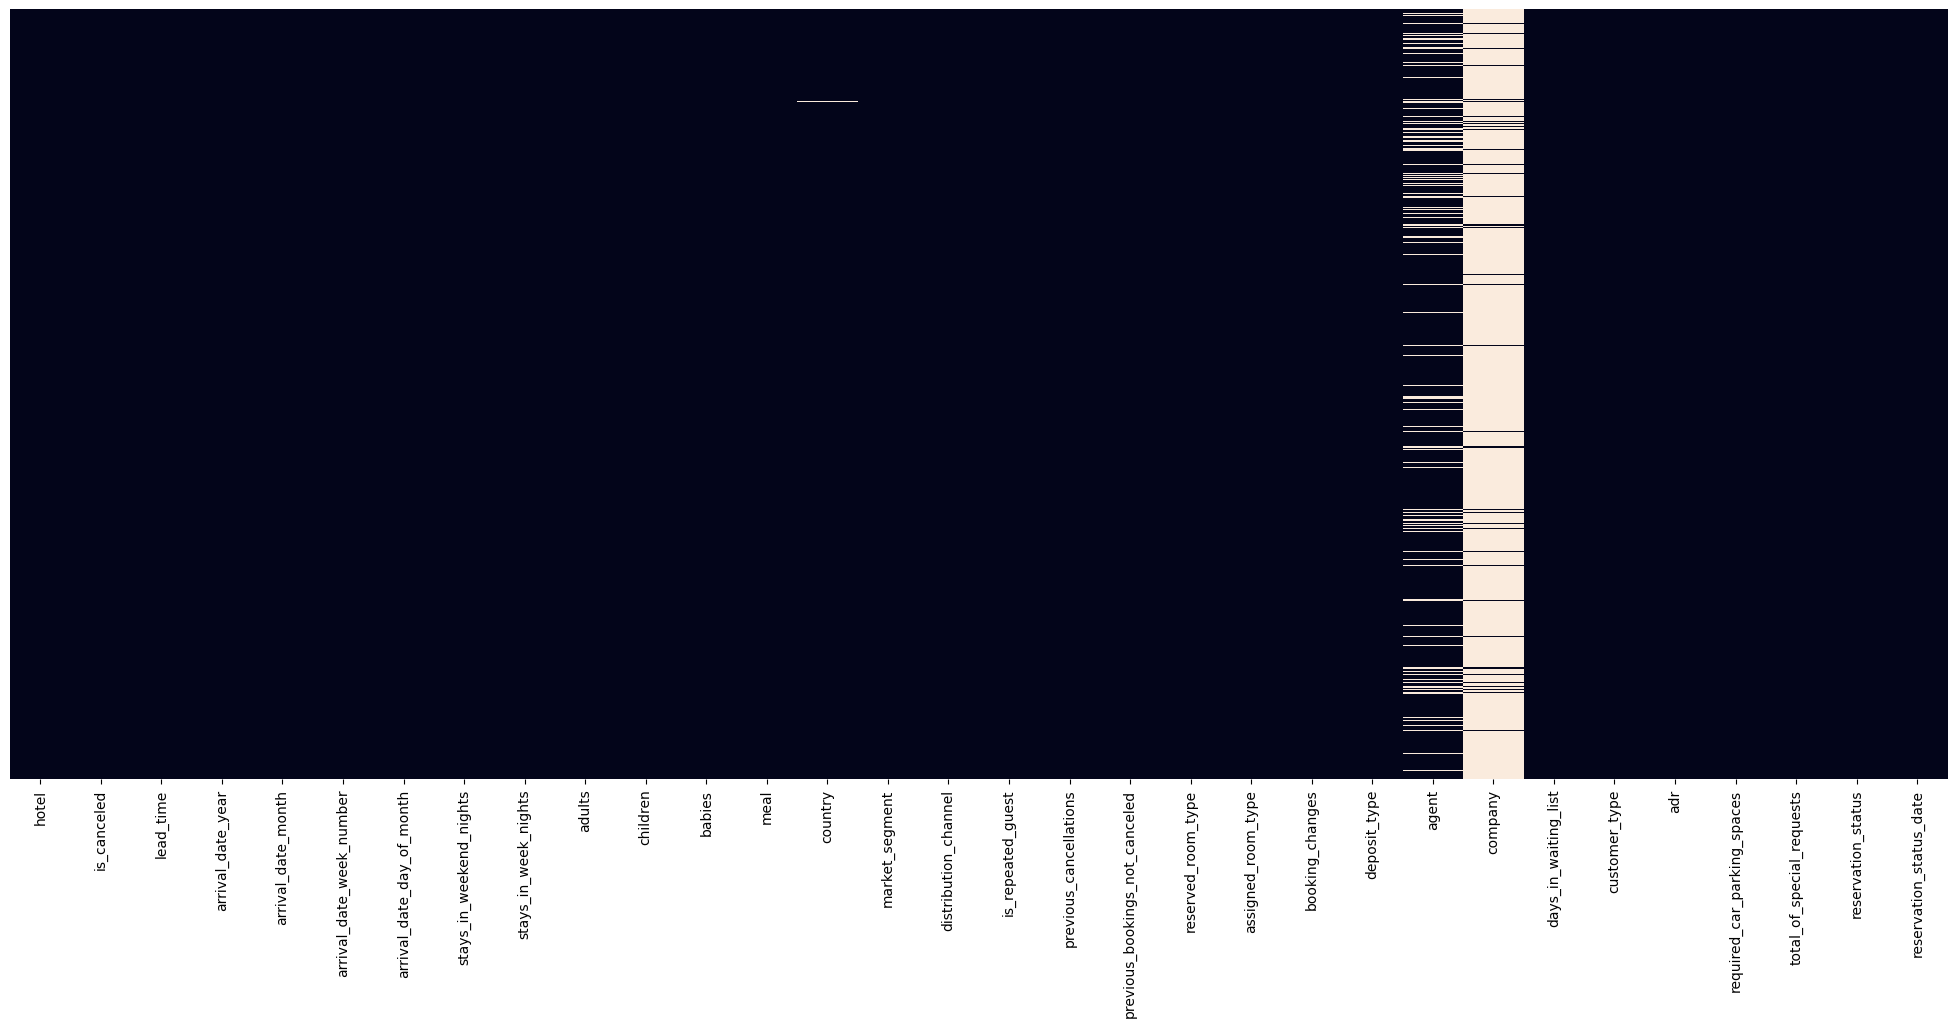

In [23]:
# Visualizing the missing values through a heat map 
plt.figure(figsize=(25, 10))
sns.heatmap(hotel_bookings_df.isnull(),cbar = False, yticklabels = False)

### What did you know about your dataset?

*From the above heatmap and data analysis i can say that:*
1. There are 119390 rows and 32 coloumns in the dataset.

2. A total of 31994 ***duplicate*** values are present in the dataset.

3. A total of 129425 ***Null*** values are present in the dataset.



## ***2. Understanding Your Variables***

In [24]:
# Dataset Columns
print(list(hotel_bookings_df.columns))

['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [25]:
# Dataset Describe
hotel_bookings_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Variables Description: 

1. **hotel** : *Hotel(Resort Hotel or City Hotel)*

2. **is_canceled** : *Value indicating if the booking was canceled (1) or not (0).*

3. **lead_time** : *Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.*

4. **arrival_date_year** : *Year of arrival date.*

5. **arrival_date_month** : *Month of arrival date.*

6. **arrival_date_week_number**: *Week number of year for arrival date.*

7. **arrival_date_day_of_month** : *Day of arrival date.*

8. **stays_in_weekend_nights** : *Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.*

9. **stays_in_week_nights** : *Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel.*

10. **adults** : *Number of adults.*

11. **children** : *Number of children.*

12. **babies** : *Number of babies.*

13. **meal** : *Type of meal booked. Categories are presented in standard hospitality meal packages.*

14. **country** : *Country of origin.*

15. **market_segment** : *Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”.*

16. **distribution_channel** : *Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”.*

17. **is_repeated_guest** : *Value indicating if the booking name was from a repeated guest (1) or not (0).*

18. **previous_cancellations** : *Number of previous bookings that were cancelled by the customer prior to the current booking.*

19. **previous_bookings_not_canceled** : *Number of previous bookings not cancelled by the customer prior to the current booking.*

20. **reserved_room_type** :*Code of room type reserved. Code is presented instead of designation for anonymity reasons.*

21. **assigned_room_type** : *Code for the type of room assigned to the booking.*

22. **booking_changes** : *Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.*

23. **deposit_type** : *Indication on if the customer made a deposit to guarantee the booking.*

24. **agent** : *ID of the travel agency that made the booking.*

25. **company** : *ID of the company/entity that made the booking or responsible for paying the booking.*

26. **days_in_waiting_list** : *Number of days the booking was in the waiting list before it was confirmed to the customer.*

27. **customer_type** : *Type of booking, assuming one of four categories.*

28. **adr** : *Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights.*

29. **required_car_parking_spaces** : *Number of car parking spaces required by the customer.*

30. **total_of_special_requests** : *Number of special requests made by the customer (e.g. twin bed or high floor).*

31. **reservation_status** : *Reservation last status, assuming one of three categories.*

* **Canceled** – *booking was canceled by the customer.*
* **Check-Out** – *customer has checked in but already departed.*
* **No-Show** – *customer did not check-in and did inform the hotel of the reason why.*
32. **reservation_status_date** : *Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel.*

### Check Unique Values for each variable.

In [26]:
# Check Unique Values for each variable. Columns with specific categories.
category_col = list(set(hotel_bookings_df.drop(columns=['reservation_status_date','country','arrival_date_month']).columns) - set(hotel_bookings_df.describe()))

for label in category_col:
  print(f'Unique values in column {label} are:, {(hotel_bookings_df[label].unique())}')

Unique values in column meal are:, ['BB' 'FB' 'HB' 'SC' 'Undefined']
Unique values in column distribution_channel are:, ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
Unique values in column reserved_room_type are:, ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']
Unique values in column market_segment are:, ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
Unique values in column assigned_room_type are:, ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']
Unique values in column hotel are:, ['Resort Hotel' 'City Hotel']
Unique values in column deposit_type are:, ['No Deposit' 'Refundable' 'Non Refund']
Unique values in column customer_type are:, ['Transient' 'Contract' 'Transient-Party' 'Group']
Unique values in column reservation_status are:, ['Check-Out' 'Canceled' 'No-Show']


## 3. ***Data Wrangling***

### Data Wrangling Code

**Handeling Duplicate Values**

In [27]:
# Removing duplicate values 
hotel_bookings_df = hotel_bookings_df.drop_duplicates()

In [28]:
# Dataset shape after removing duplicate values 
hotel_bookings_df.shape

(87396, 32)

**Handeling Null Values**


In [29]:
# Filling/replacing null values with 0.
col_null = ['agent','children','company']
for col in col_null:
  hotel_bookings_df[col].fillna(0,inplace = True)

In [30]:
# Replacing Country column null values with 'others'.
hotel_bookings_df['country'].fillna('others',inplace = True)

In [31]:
# All Null values Successfully removed.
hotel_bookings_df.isna().sum().sort_values(ascending=False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null values'})

,Columns,Null values
0,hotel,0
1,is_canceled,0
2,reservation_status,0
3,total_of_special_requests,0
4,required_car_parking_spaces,0
5,adr,0


**Adding new columns**

In [32]:
# Adding a column for total guest per booking and total duration of stay of an old customer.
hotel_bookings_df['total_guest'] = hotel_bookings_df['children'] + hotel_bookings_df['adults'] + hotel_bookings_df['babies']
hotel_bookings_df['total_time'] = hotel_bookings_df['stays_in_week_nights'] + hotel_bookings_df['stays_in_weekend_nights']

**Removing Invalid Data**


In [34]:
# Checking where the total guests is zero. Which will be deemed as an invalid booking.
len(hotel_bookings_df[hotel_bookings_df['adults'] + hotel_bookings_df['babies'] + hotel_bookings_df['children'] == 0])

166

In [35]:
# Removing the 166 invalid bookings.
hotel_bookings_df.drop(hotel_bookings_df[hotel_bookings_df['adults'] + hotel_bookings_df['babies'] + hotel_bookings_df['children'] == 0].index, inplace = True)

In [37]:
hotel_bookings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87230 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87230 non-null  object 
 1   is_canceled                     87230 non-null  int64  
 2   lead_time                       87230 non-null  int64  
 3   arrival_date_year               87230 non-null  int64  
 4   arrival_date_month              87230 non-null  object 
 5   arrival_date_week_number        87230 non-null  int64  
 6   arrival_date_day_of_month       87230 non-null  int64  
 7   stays_in_weekend_nights         87230 non-null  int64  
 8   stays_in_week_nights            87230 non-null  int64  
 9   adults                          87230 non-null  int64  
 10  children                        87230 non-null  float64
 11  babies                          87230 non-null  int64  
 12  meal                           

**Changing Data Types**

In [38]:
# Changing data type of children and agent column data type to int64 for proper usage
hotel_bookings_df['children'] = hotel_bookings_df['children'].astype(int)
hotel_bookings_df['agent'] = hotel_bookings_df['agent'].astype(int)    

In [39]:
hotel_bookings_df[['children','agent']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87230 entries, 0 to 119389
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   children  87230 non-null  int64
 1   agent     87230 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


**Seprating Datasets on basis of type of Hotel.**

In [40]:
resort_hotel_df = hotel_bookings_df[hotel_bookings_df['hotel'] == 'Resort Hotel']
city_hotel_df = hotel_bookings_df[hotel_bookings_df['hotel'] == 'City Hotel']

### What all manipulations have you done and insights you found?

**1.** *I handeled all the duplicate values by removing the duplicate values by using the function .drop_duplicate()*

**2.** *Handeling all the null values as required*
1. *Filling **0** in missing values of coloumn of agents and company.*
2. *Putting **Others** in issing values of country assuming that the customer's cuntry wasn't listed or known*
3. *For Childrens column filling **0** assuming no child was with the customer*

**3.** *Removing useless 166 invalid data found where the number of guets are zero using .drop*

**4.** *Adding new columns 'total_guests' to take in account the number of total guests per booking*

**5.** *Adding a new column 'total_time' showing the total time spent by the guests during weekdays and weekends in the hotel*

**6.** *Changing data types of children and agent column from float to int64 for making operations simpler and suitable.*

**7.** *Making seprate datasets for Resort Hotels and City Hotels for making the comparison of data during analysis easier to perform.*

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***